Machine Failure Prediction

 1. Data Pre-processing (label encoding)
 2. EDA
 3. Classification model development
 4. Prediction on Test data

Dataset Features:
1. Air_temperature      
2. Process_temperature  
3. Rotational_speed       
4. Torque               
5. Tool_wear              
6. Target 

 https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset 


 Feature Selection:


 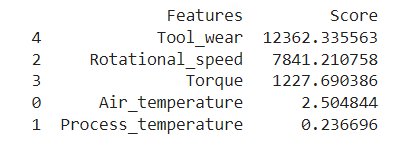







# Importing libraries



In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [145]:
data = pd.read_csv('Failure_pred_train.csv')

In [146]:
data.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air_temperature      10000 non-null  float64
 1   Process_temperature  10000 non-null  float64
 2   Rotational_speed     10000 non-null  int64  
 3   Torque               10000 non-null  float64
 4   Tool_wear            10000 non-null  int64  
 5   Target               10000 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 468.9+ KB


# Data Preprocessing

# EDA

Data Visualisation

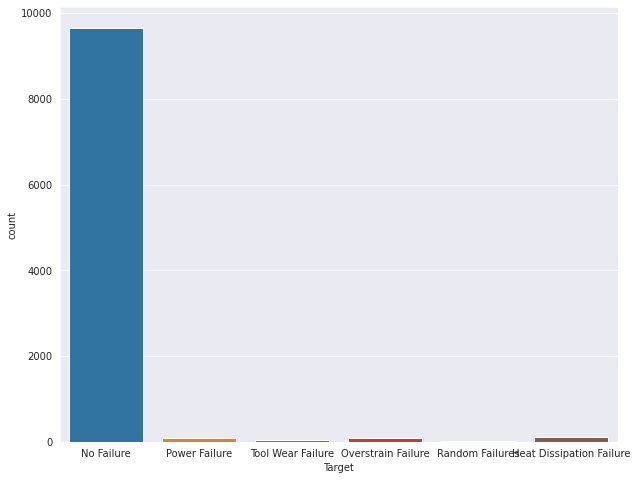

In [148]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="Target")

# Pre Processing for Prediction 

## Encoding

In [149]:
df_corr=data.copy()

In [150]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(df_corr['Target'])
df_corr['Target'] = label_encoder.transform(df_corr['Target'])

In [151]:
df_corr.tail()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
9995,298.8,308.4,1604,29.5,14,1
9996,298.9,308.4,1632,31.8,17,1
9997,299.0,308.6,1645,33.4,22,1
9998,299.0,308.7,1408,48.5,25,1
9999,299.0,308.7,1500,40.2,30,1


In [152]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
Air_temperature,1.000000,0.876107,0.022670,-0.013778,0.013853,-0.030431
Process_temperature,0.876107,1.000000,0.019277,-0.014061,0.013488,-0.011179
Rotational_speed,0.022670,0.019277,1.000000,-0.875027,0.000223,0.084444
Torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.028701
Tool_wear,0.013853,0.013488,0.000223,-0.003093,1.000000,0.113137
Target,-0.030431,-0.011179,0.084444,0.028701,0.113137,1.000000


In [153]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_clf=df_corr.iloc[:,0:5] 
y_clf=df_corr.iloc[:,5]
bestfeatures = SelectKBest (chi2, k='all')
fit= bestfeatures.fit(X_clf,y_clf)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_clf.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.sort_values(by=['Score'],ascending=False))

              Features         Score
4            Tool_wear  12362.335563
2     Rotational_speed   7841.210758
3               Torque   1227.690386
0      Air_temperature      2.504844
1  Process_temperature      0.236696


In [154]:
data.drop(columns = ['Air_temperature'], inplace = True)

In [155]:
data

,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
0,308.6,1551,42.8,0,No Failure
1,308.7,1408,46.3,3,No Failure
2,308.5,1498,49.4,5,No Failure
3,308.6,1433,39.5,7,No Failure
4,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...
9995,308.4,1604,29.5,14,No Failure
9996,308.4,1632,31.8,17,No Failure
9997,308.6,1645,33.4,22,No Failure
9998,308.7,1408,48.5,25,No Failure


In [156]:
data['Target'].replace({'No Failure': 0, 'Heat Dissipation Failure': 1,'Overstrain Failure': 2,'Power Failure':3,'Random Failures':4,'Tool Wear Failure':5},inplace=True)

## Test Tain Split

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Target'],axis=1),
                                                    data['Target'], test_size=0.3, random_state=42)

## Model development



In [159]:
import time

from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')



classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [160]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [161]:
display(classifiers)

,Classifier,Imported as
0,Random Forest,rfc
1,k Nearest Neighbours,knn


In [162]:
models_to_test = [rfc,knn]

In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 9069 to 7270
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Process_temperature  7000 non-null   float64
 1   Rotational_speed     7000 non-null   int64  
 2   Torque               7000 non-null   float64
 3   Tool_wear            7000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 273.4 KB


In [164]:
classification = Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

RandomForestClassifier() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit


In [165]:
classification.results()

,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,97.933,0.986143
1,KNeighborsClassifier,95.533,0.095500


In [166]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: RandomForestClassifier
Accuracy of model: 97.933
Training Runtime in seconds 0.986
Classification Matrix:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2907
           1       0.00      0.00      0.00        23
           2       0.87      0.59      0.70        22
           3       0.90      0.84      0.87        31
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        14

    accuracy                           0.98      3000
   macro avg       0.46      0.40      0.43      3000
weighted avg       0.97      0.98      0.97      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
import pickle
with open("RF_failure_prediction_model.pickle", "wb") as f:
    pickle.dump(rfc, f)
with open("RF_failure_prediction_model.pickle", "rb") as f:
    print(pickle.load(f))

RandomForestClassifier()


##Prediction on Test data

In [168]:
df_test = pd.read_csv("Failure_pred_test.csv")
df_test.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,297.0,308.3,1399,46.4,132
1,298.6,309.8,1505,45.7,144
2,298.4,307.7,1626,31.1,166
3,299.6,309.5,1570,35.5,189
4,299.3,309.0,1447,50.4,140


In [169]:
df_test.drop(columns = ['Air_temperature'], inplace = True)

In [170]:
ynew = rfc.predict(df_test)

In [171]:
df_test['Target']=ynew

In [172]:
df_test#streamlit

,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
0,308.3,1399,46.4,132,0
1,309.8,1505,45.7,144,0
2,307.7,1626,31.1,166,0
3,309.5,1570,35.5,189,0
4,309.0,1447,50.4,140,0
5,309.2,1687,27.7,95,0
6,310.5,1602,32.3,2,0
7,312.3,1346,61.2,170,0
8,312.1,1499,35.0,215,0
9,308.7,1667,28.6,18,0


In [175]:
df_test['Target'].replace({ 0:'No Failure',1: 'Heat Dissipation Failure',2:'Overstrain Failure',3:'Power Failure',4:'Random Failures',5:'Tool Wear Failure'},inplace=True)

In [176]:
df_test

,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
0,308.3,1399,46.4,132,No Failure
1,309.8,1505,45.7,144,No Failure
2,307.7,1626,31.1,166,No Failure
3,309.5,1570,35.5,189,No Failure
4,309.0,1447,50.4,140,No Failure
5,309.2,1687,27.7,95,No Failure
6,310.5,1602,32.3,2,No Failure
7,312.3,1346,61.2,170,No Failure
8,312.1,1499,35.0,215,No Failure
9,308.7,1667,28.6,18,No Failure
